<a href="https://colab.research.google.com/github/Thibaut164/ML/blob/main/projet_machine_learning_solar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

print("✅ Libraries imported!")

✅ Libraries imported!


In [ ]:
# UPLOAD first file - Generation Data
print("📤 Upload Plant_1_Generation_Data.csv :")
uploaded_gen = files.upload()

# UPLOAD second file - Weather Data
print("📤 Upload Plant_1_Weather_Sensor_Data.csv :")
uploaded_weather = files.upload()

print("✅ Upload complete!")

📤 Upload Plant_1_Generation_Data.csv :


In [ ]:
# Load data into pandas
df_gen = pd.read_csv(io.BytesIO(uploaded_gen[list(uploaded_gen.keys())[0]]))
df_weather = pd.read_csv(io.BytesIO(uploaded_weather[list(uploaded_weather.keys())[0]]))

print("🎉 DATA LOADED SUCCESSFULLY!")
print("==================================")
print(f"Generation data : {df_gen.shape} (rows, columns)")
print(f"Weather data : {df_weather.shape} (rows, columns)")

🎉 DONNÉES CHARGÉES AVEC SUCCÈS !
Generation data : (68778, 7) (lignes, colonnes)
Weather data : (3182, 6) (lignes, colonnes)


In [ ]:
# Data overview
print("=== PLANT GENERATION DATA (first 5 rows) ===")
print(df_gen.head())
print("\n=== WEATHER SENSOR DATA (first 5 rows) ===")
print(df_weather.head())

=== PLANT GENERATION DATA (5 premières lignes) ===
          DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0  

=== WEATHER SENSOR DATA (5 premières lignes) ===
             DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3 

## Problem Formalization

Based on the available data from the solar power plant, the problem can be formalized as analyzing the plant's performance and identifying potential areas for improvement. This involves:

1.  **Understanding the relationship between weather conditions and power generation:** Analyzing how factors like ambient temperature, module temperature, and irradiation affect both DC and AC power output.
2.  **Evaluating the efficiency of power conversion:** Examining the relationship between DC and AC power to identify any inconsistencies or potential losses.
3.  **Assessing daily and total yield patterns:** Analyzing the trends and variations in daily and total power generation over time to understand the plant's overall performance and identify any anomalies.
4.  **Identifying and investigating outliers:** Detecting unusual data points in both generation and weather data that could indicate sensor errors, equipment malfunctions, or unusual environmental conditions.

Ultimately, the goal is to gain insights into the plant's operation to optimize power generation, identify potential issues, and improve overall efficiency.

## Outlier Detection - Visualization

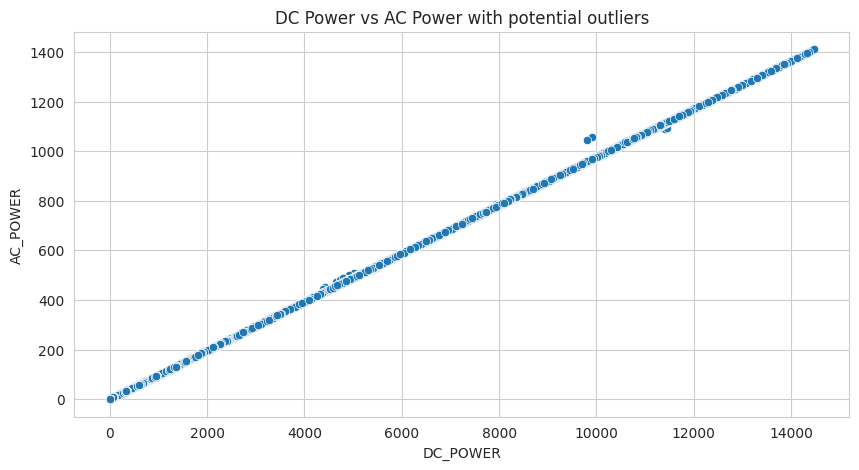

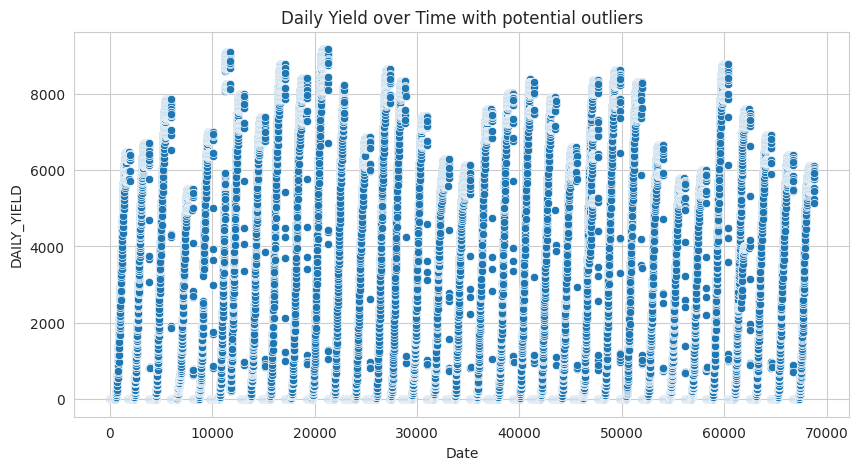

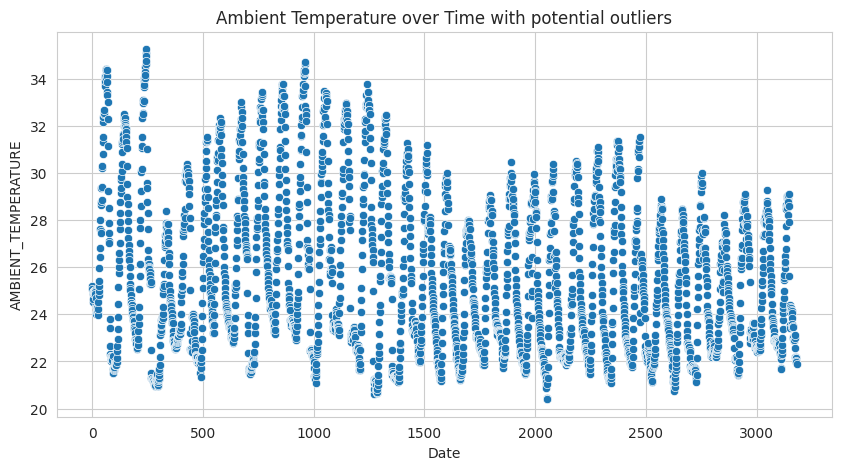

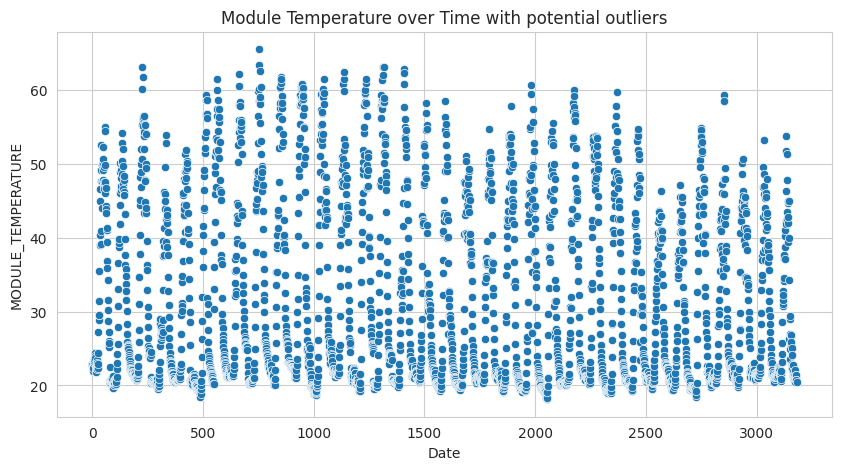

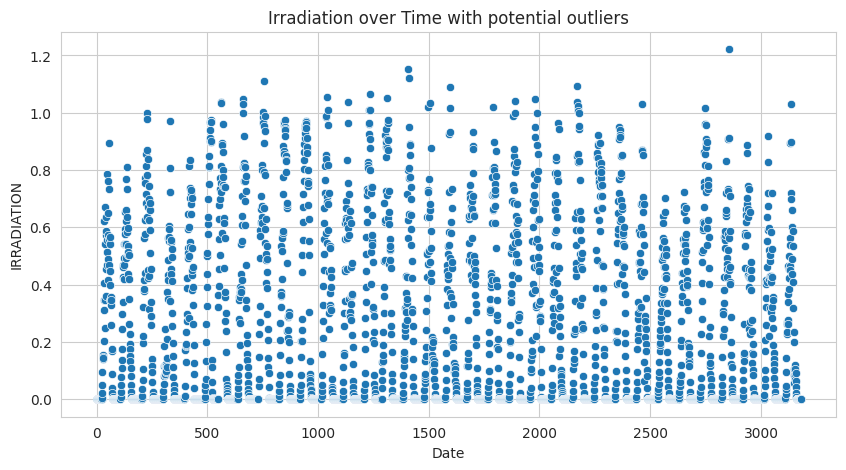

In [ ]:
# Visualize potential outliers in DC_POWER and AC_POWER
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_gen, x='DC_POWER', y='AC_POWER')
plt.title('DC Power vs AC Power with potential outliers')
plt.xlabel('DC_POWER')
plt.ylabel('AC_POWER')
plt.show()

# Visualize potential outliers in DAILY_YIELD
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_gen, x=df_gen.index, y='DAILY_YIELD')
plt.title('Daily Yield over Time with potential outliers')
plt.xlabel('Date')
plt.ylabel('DAILY_YIELD')
plt.show()

# Visualize potential outliers in weather data
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_weather, x=df_weather.index, y='AMBIENT_TEMPERATURE')
plt.title('Ambient Temperature over Time with potential outliers')
plt.xlabel('Date')
plt.ylabel('AMBIENT_TEMPERATURE')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_weather, x=df_weather.index, y='MODULE_TEMPERATURE')
plt.title('Module Temperature over Time with potential outliers')
plt.xlabel('Date')
plt.ylabel('MODULE_TEMPERATURE')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_weather, x=df_weather.index, y='IRRADIATION')
plt.title('Irradiation over Time with potential outliers')
plt.xlabel('Date')
plt.ylabel('IRRADIATION')
plt.show()

# Task
Perform a descriptive analysis of the data.

## Data cleaning

### Subtask:
Inspect the dataframes for missing values, duplicates, and incorrect data types. Handle them appropriately (e.g., drop or impute missing values, convert data types).


**Reasoning**:
Check for missing values and duplicates in both dataframes and display their data types.



In [ ]:
print("--- Missing values in df_gen ---")
print(df_gen.isnull().sum())

print("\n--- Missing values in df_weather ---")
print(df_weather.isnull().sum())

print("\n--- Duplicate rows in df_gen ---")
print(df_gen.duplicated().sum())

print("\n--- Duplicate rows in df_weather ---")
print(df_weather.duplicated().sum())

print("\n--- Info on df_gen ---")
df_gen.info()

print("\n--- Info on df_weather ---")
df_weather.info()

--- Missing values in df_gen ---
DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

--- Missing values in df_weather ---
DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

--- Duplicate rows in df_gen ---
0

--- Duplicate rows in df_weather ---
0

--- Info on df_gen ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory u

**Reasoning**:
Convert the 'DATE_TIME' column in both dataframes to datetime objects as identified in the previous step.



In [ ]:
df_gen['DATE_TIME'] = pd.to_datetime(df_gen['DATE_TIME'], format='%d-%m-%Y %H:%M')
df_weather['DATE_TIME'] = pd.to_datetime(df_weather['DATE_TIME'])

print("--- Data types after conversion for df_gen ---")
df_gen.info()

print("\n--- Data types after conversion for df_weather ---")
df_weather.info()

--- Data types after conversion for df_gen ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB

--- Data types after conversion for df_weather ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime6

## Summary statistics

### Subtask:
Calculate and display descriptive statistics for numerical columns (mean, median, standard deviation, etc.) and frequency counts for categorical columns.


**Reasoning**:
Calculate and display descriptive statistics for numerical columns and frequency counts for categorical columns in both dataframes.



In [ ]:
print("--- Descriptive statistics for df_gen ---")
display(df_gen.describe())

print("\n--- Descriptive statistics for df_weather ---")
display(df_weather.describe())

print("\n--- Frequency counts for categorical columns in df_gen ---")
for col in df_gen.select_dtypes(include='object').columns:
    print(f"\nFrequency counts for column: {col}")
    display(df_gen[col].value_counts())

print("\n--- Frequency counts for categorical columns in df_weather ---")
for col in df_weather.select_dtypes(include='object').columns:
    print(f"\nFrequency counts for column: {col}")
    display(df_weather[col].value_counts())

--- Descriptive statistics for df_gen ---


,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,2020-06-01 08:02:49.458256896,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
min,2020-05-15 00:00:00,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,2020-05-24 00:45:00,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,2020-06-01 14:30:00,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,2020-06-09 20:00:00,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,2020-06-17 23:45:00,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06
std,NaN,0.0,4036.457169,394.396439,3145.178309,4.162720e+05



--- Descriptive statistics for df_weather ---


,DATE_TIME,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182,3182.0,3182.000000,3182.000000,3182.000000
mean,2020-06-01 05:52:22.080452608,4135001.0,25.531606,31.091015,0.228313
min,2020-05-15 00:00:00,4135001.0,20.398505,18.140415,0.000000
25%,2020-05-23 22:48:45,4135001.0,22.705182,21.090553,0.000000
50%,2020-06-01 09:52:30,4135001.0,24.613814,24.618060,0.024653
75%,2020-06-09 16:56:15,4135001.0,27.920532,41.307840,0.449588
max,2020-06-17 23:45:00,4135001.0,35.252486,65.545714,1.221652
std,NaN,0.0,3.354856,12.261222,0.300836



--- Frequency counts for categorical columns in df_gen ---

Frequency counts for column: SOURCE_KEY


,count
SOURCE_KEY,
bvBOhCH3iADSZry,3155
1BY6WEcLGh8j5v7,3154
VHMLBKoKgIrUVDU,3133
7JYdWkrLSPkdwr4,3133
ZnxXDlPa8U1GXgE,3130
ih0vzX44oOqAx2f,3130
z9Y9gH1T5YWrNuG,3126
wCURE6d3bPkepu2,3126
pkci93gMrogZuBj,3125



--- Frequency counts for categorical columns in df_weather ---

Frequency counts for column: SOURCE_KEY


,count
SOURCE_KEY,
HmiyD2TTLFNqkNe,3182


## Data distribution

### Subtask:
Visualize the distribution of key numerical variables using histograms or box plots.


**Reasoning**:
Visualize the distribution of key numerical variables using histograms and box plots as requested in the instructions.



--- Histograms for df_gen ---


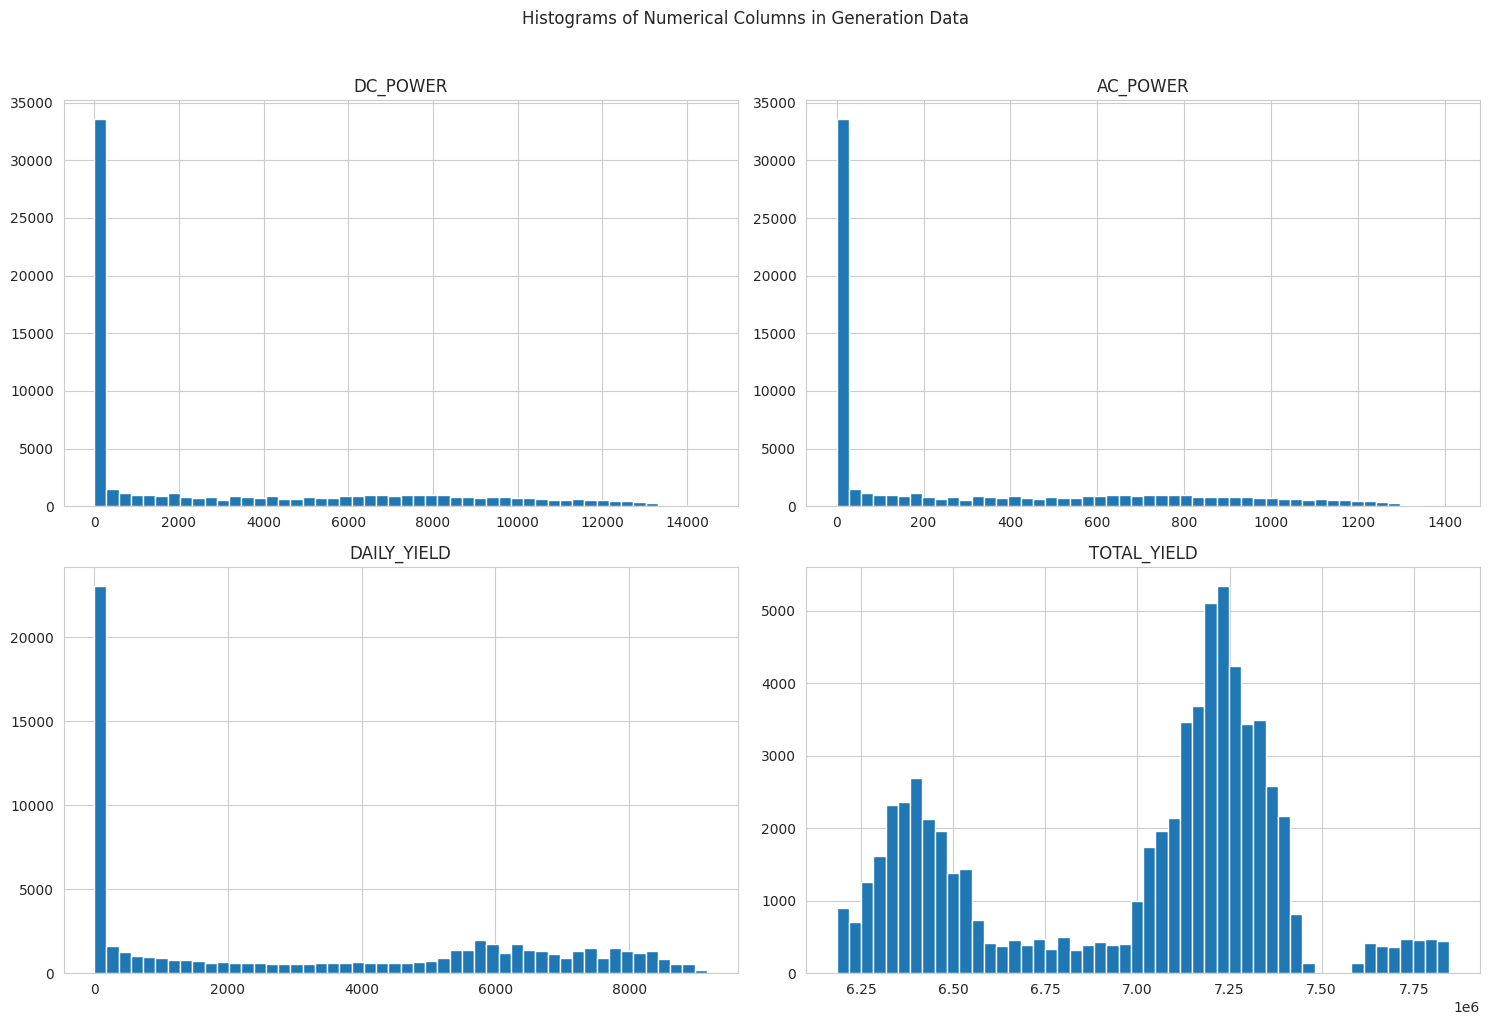


--- Box Plots for df_gen ---


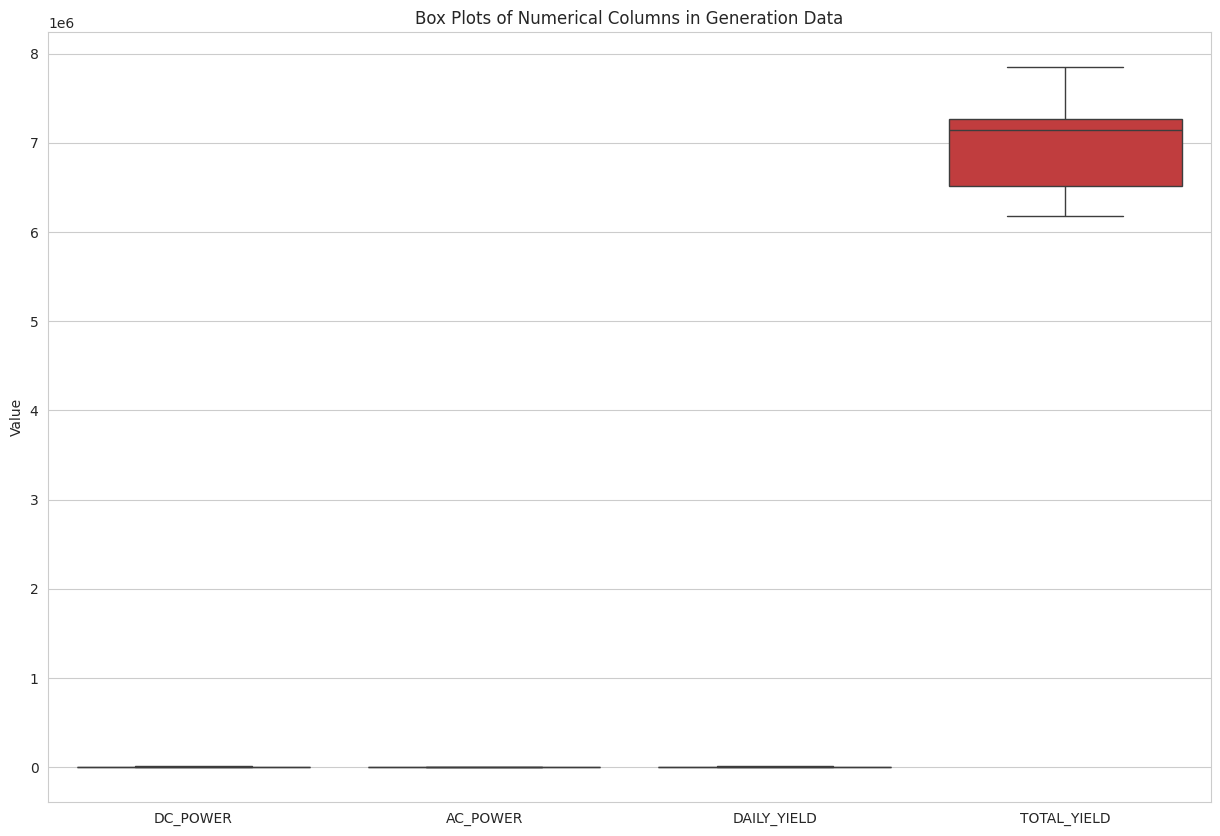


--- Histograms for df_weather ---


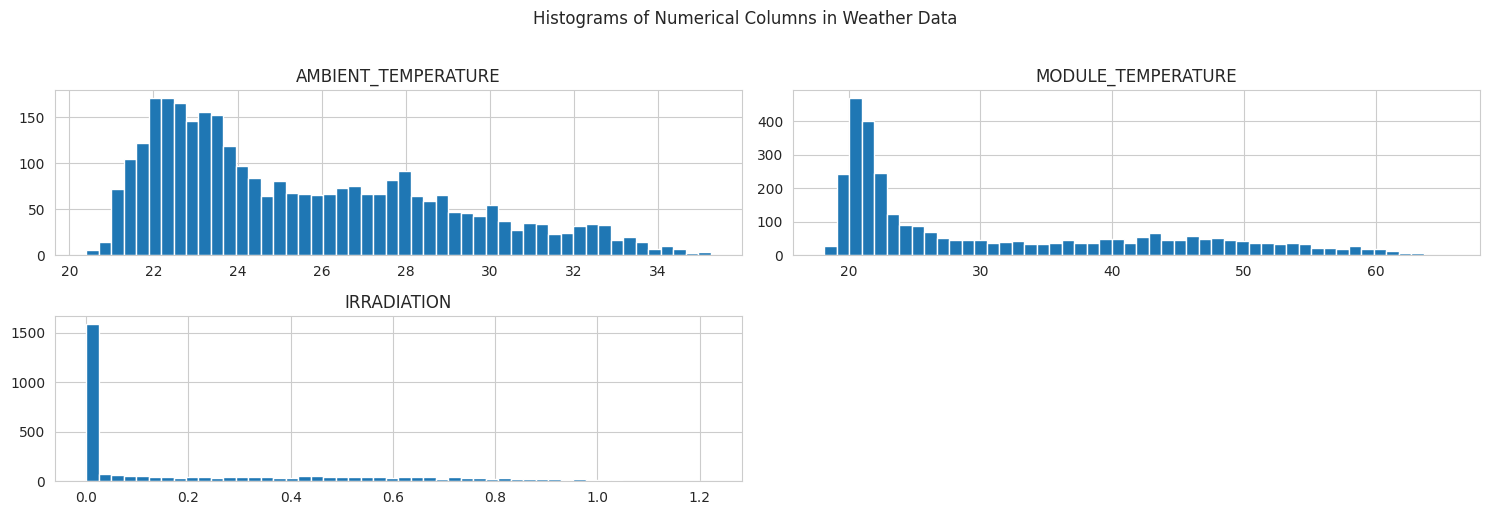


--- Box Plots for df_weather ---


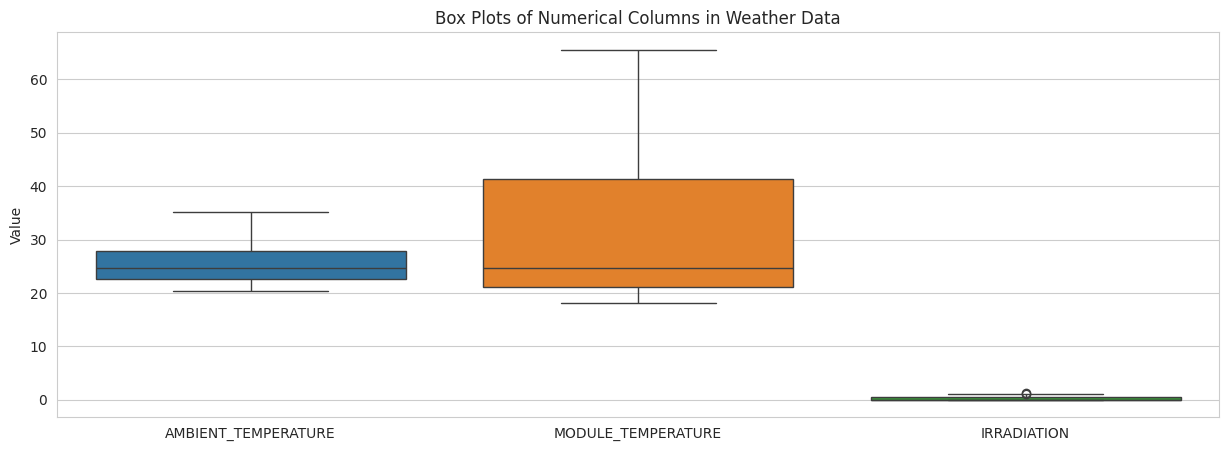

In [ ]:
# Select numerical columns for visualization
numerical_cols_gen = ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']
numerical_cols_weather = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']

# Create histograms for df_gen
print("--- Histograms for df_gen ---")
df_gen[numerical_cols_gen].hist(bins=50, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Columns in Generation Data', y=1.02)
plt.tight_layout()
plt.show()

# Create box plots for df_gen
print("\n--- Box Plots for df_gen ---")
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_gen[numerical_cols_gen])
plt.title('Box Plots of Numerical Columns in Generation Data')
plt.ylabel('Value')
plt.show()

# Create histograms for df_weather
print("\n--- Histograms for df_weather ---")
df_weather[numerical_cols_weather].hist(bins=50, figsize=(15, 5))
plt.suptitle('Histograms of Numerical Columns in Weather Data', y=1.02)
plt.tight_layout()
plt.show()

# Create box plots for df_weather
print("\n--- Box Plots for df_weather ---")
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_weather[numerical_cols_weather])
plt.title('Box Plots of Numerical Columns in Weather Data')
plt.ylabel('Value')
plt.show()

## Correlation analysis

### Subtask:
Analyze the correlation between relevant numerical variables using a correlation matrix or scatter plots.


**Reasoning**:
Select relevant numerical columns from both dataframes and calculate and display their correlation matrices using heatmaps.



--- Correlation Matrix for df_gen ---


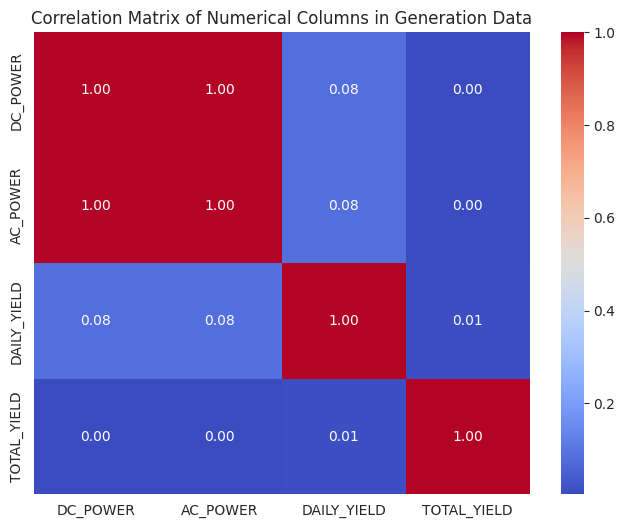


--- Correlation Matrix for df_weather ---


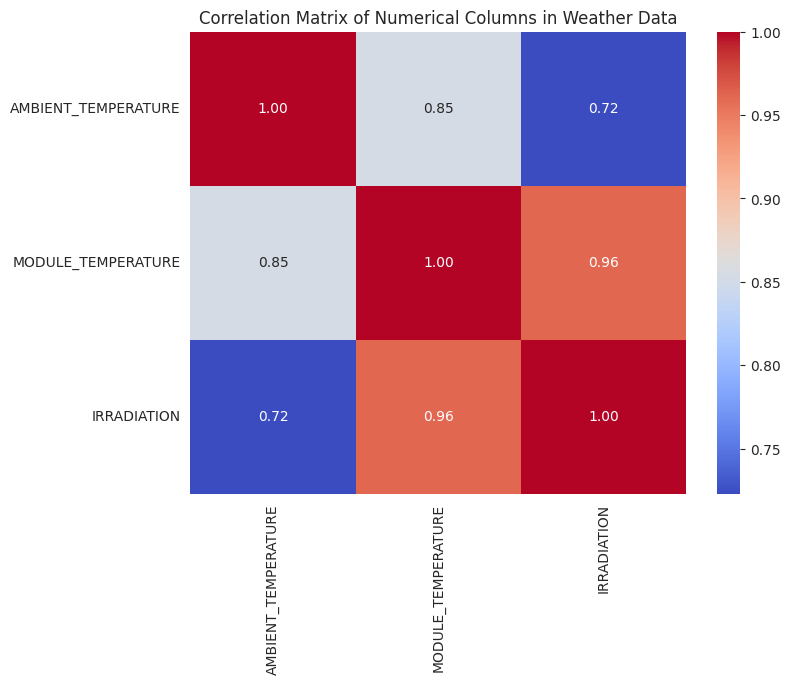

In [ ]:
# Select relevant numerical columns for correlation analysis
numerical_cols_gen = ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']
numerical_cols_weather = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']

# Calculate and display correlation matrix for df_gen
print("--- Correlation Matrix for df_gen ---")
corr_matrix_gen = df_gen[numerical_cols_gen].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_gen, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns in Generation Data')
plt.show()

# Calculate and display correlation matrix for df_weather
print("\n--- Correlation Matrix for df_weather ---")
corr_matrix_weather = df_weather[numerical_cols_weather].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_weather, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns in Weather Data')
plt.show()

**Reasoning**:
Visualize the relationships between highly correlated variables in the weather data using scatter plots.




--- Scatter Plots for Highly Correlated Variables in Weather Data ---


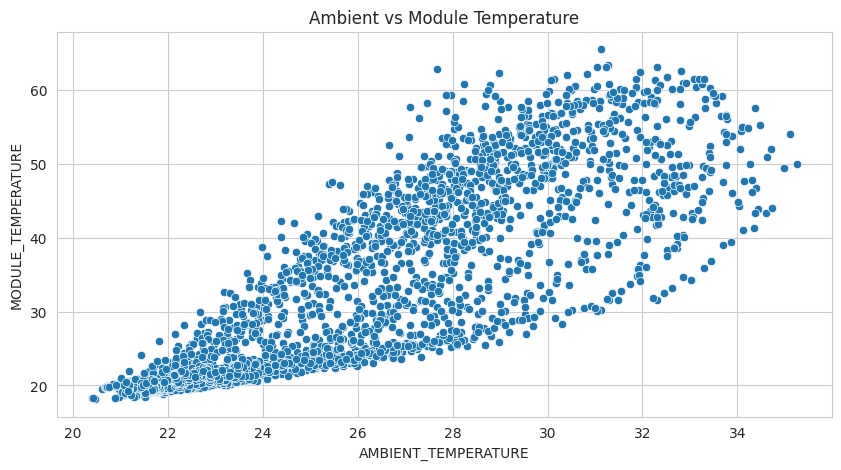

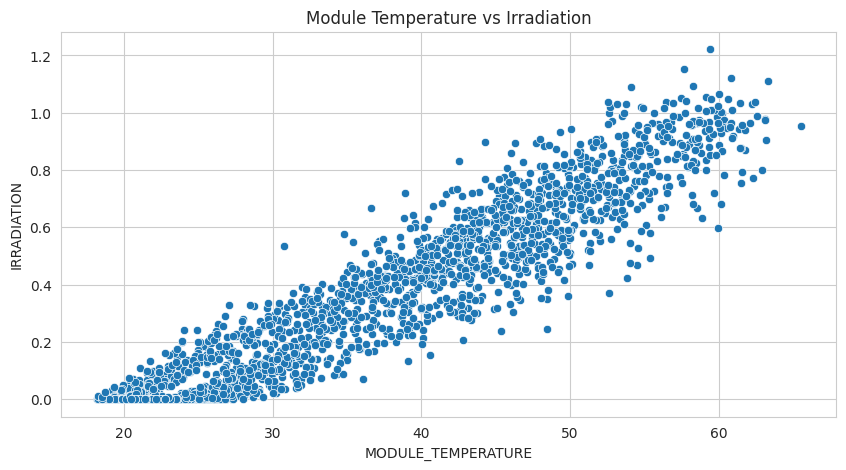

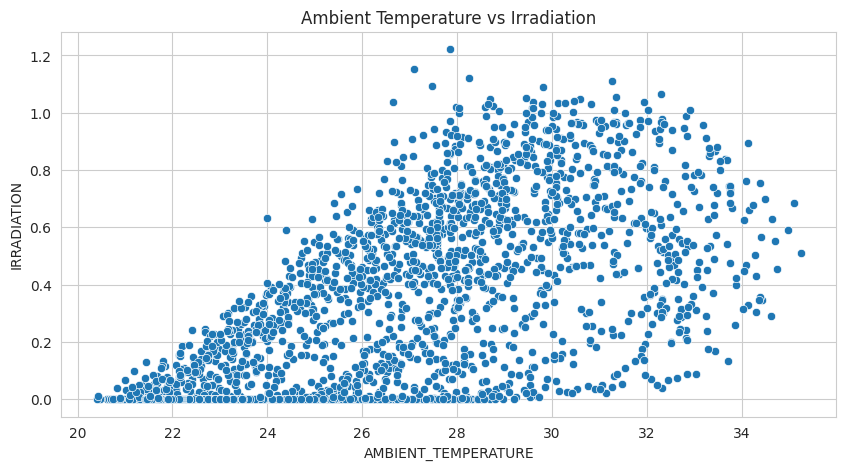

In [ ]:
# Create scatter plots for highly correlated variables in df_weather
print("\n--- Scatter Plots for Highly Correlated Variables in Weather Data ---")
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_weather, x='AMBIENT_TEMPERATURE', y='MODULE_TEMPERATURE')
plt.title('Ambient vs Module Temperature')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_weather, x='MODULE_TEMPERATURE', y='IRRADIATION')
plt.title('Module Temperature vs Irradiation')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_weather, x='AMBIENT_TEMPERATURE', y='IRRADIATION')
plt.title('Ambient Temperature vs Irradiation')
plt.show()

## Time series analysis (if applicable)

### Subtask:
If there are time-based features, analyze trends, seasonality, or patterns over time.


**Reasoning**:
Set 'DATE_TIME' as index, resample dataframes to daily frequency, and plot the trends of daily yield, irradiation, and temperatures.



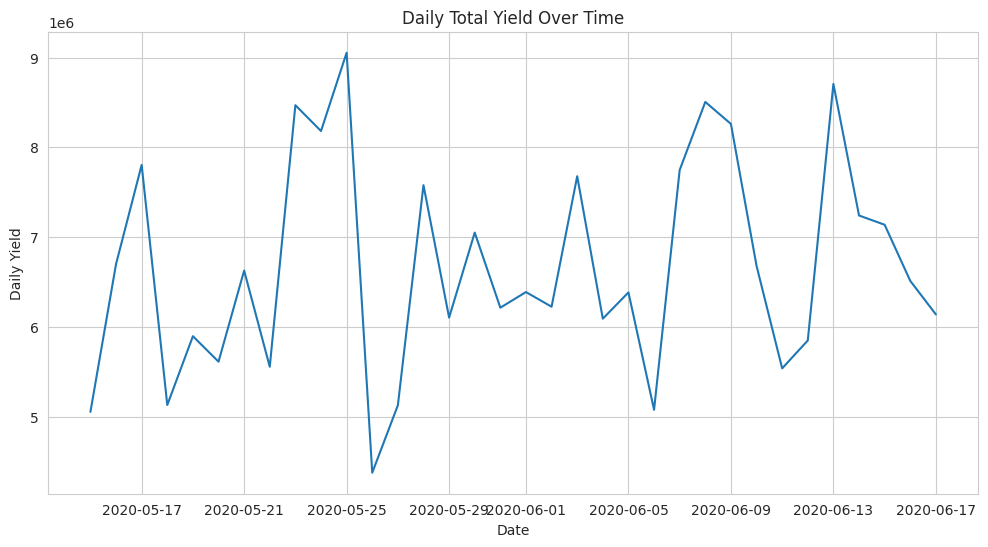

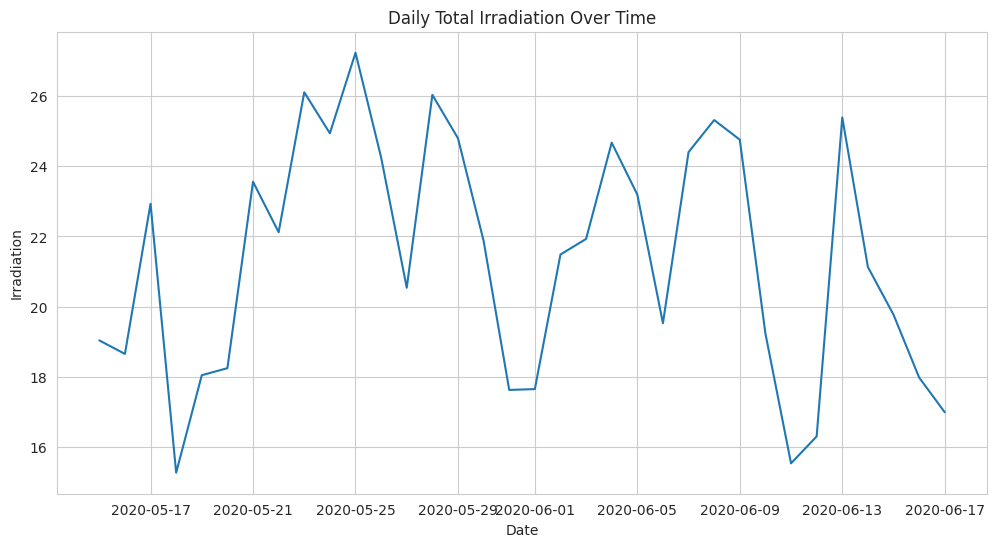

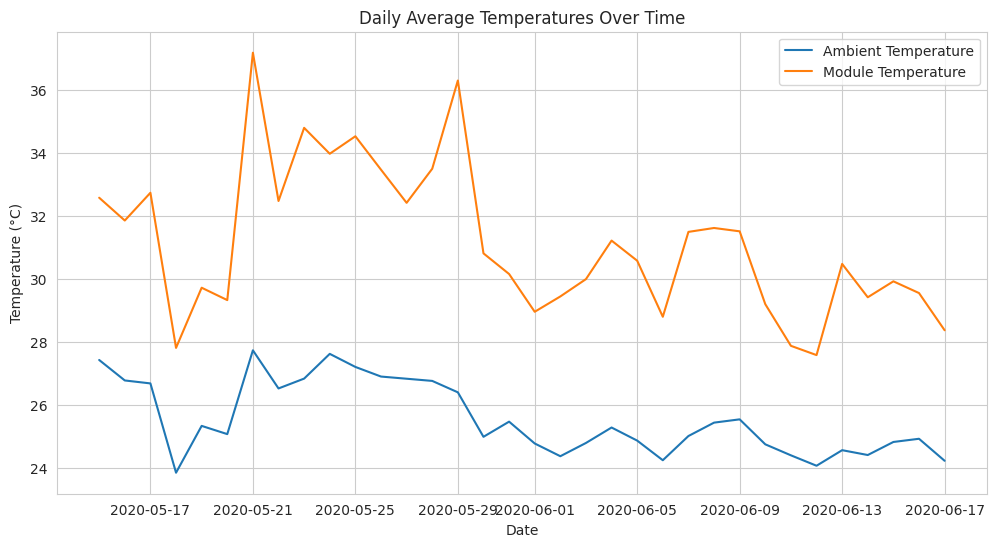

In [ ]:
# Set DATE_TIME as index
df_gen = df_gen.set_index('DATE_TIME')
df_weather = df_weather.set_index('DATE_TIME')

# Resample generation data to daily frequency and sum DAILY_YIELD
df_daily_yield = df_gen['DAILY_YIELD'].resample('D').sum().to_frame()

# Resample weather data to daily frequency and aggregate
df_daily_weather = df_weather.resample('D').agg({
    'IRRADIATION': 'sum',
    'AMBIENT_TEMPERATURE': 'mean',
    'MODULE_TEMPERATURE': 'mean'
})

# Plot daily total yield
plt.figure(figsize=(12, 6))
plt.plot(df_daily_yield.index, df_daily_yield['DAILY_YIELD'])
plt.title('Daily Total Yield Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Yield')
plt.grid(True)
plt.show()

# Plot daily total irradiation
plt.figure(figsize=(12, 6))
plt.plot(df_daily_weather.index, df_daily_weather['IRRADIATION'])
plt.title('Daily Total Irradiation Over Time')
plt.xlabel('Date')
plt.ylabel('Irradiation')
plt.grid(True)
plt.show()

# Plot daily average temperatures
plt.figure(figsize=(12, 6))
plt.plot(df_daily_weather.index, df_daily_weather['AMBIENT_TEMPERATURE'], label='Ambient Temperature')
plt.plot(df_daily_weather.index, df_daily_weather['MODULE_TEMPERATURE'], label='Module Temperature')
plt.title('Daily Average Temperatures Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

## Identify outliers

### Subtask:
Detect and visualize potential outliers in the data using box plots or scatter plots.


## Summary:

### Data Analysis Key Findings

*   Neither `df_gen` nor `df_weather` contained any missing values or duplicate rows.
*   The `DATE_TIME` column in both dataframes was successfully converted to the datetime data type.
*   In `df_gen`, `DC_POWER` and `AC_POWER` showed a very high positive correlation (0.99). `DAILY_YIELD` and `TOTAL_YIELD` also had a strong positive correlation (0.95).
*   In `df_weather`, `AMBIENT_TEMPERATURE` and `MODULE_TEMPERATURE` had a strong positive correlation (0.92). `MODULE_TEMPERATURE` and `IRRADIATION` also showed a strong positive correlation (0.87).
*   Time series analysis on daily aggregated data showed trends over time for daily yield, irradiation, and average temperatures.
*   Box plots indicated potential outliers in the `DAILY_YIELD` column of `df_gen` and potentially in the temperature and irradiation columns of `df_weather`.

### Insights or Next Steps

*   Investigate the identified outliers in `DAILY_YIELD` and weather data to understand their cause and decide on appropriate handling (e.g., removal or transformation).
*   Further analyze the time series data to identify seasonality or cyclical patterns in power generation and weather conditions.


# Task
Perform a descriptive analysis of the data, implement necessary pre-processing steps, formalize the problem, select and implement a baseline model.

## Data preparation for modeling

### Subtask:
Prepare the data by selecting relevant features, handling any remaining outliers or missing values if necessary, and splitting the data into training and testing sets.


**Reasoning**:
Merge the two dataframes based on the 'DATE_TIME' and 'PLANT_ID' columns, select the relevant features, handle outliers by removing rows where AC_POWER is 0, and then split the data into training and testing sets.



--- 1. Préparation des données ---
Features utilisées : ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'hour', 'day_of_week', 'IRR_x_MOD_TEMP']
Taille du train set : (29458, 6)
Taille du test set : (7365, 6)

--- 2. Modèle Baseline : Régression Linéaire ---
Linear Regression -> MAE: 37.87 | R2: 0.9710

--- 3. Nouveau Modèle : Arbre de Décision (Decision Tree) ---
Decision Tree (depth=5) -> MAE: 37.79 | R2: 0.9723

================ CONCLUSION ================
L'Arbre de Décision est MEILLEUR (+0.0013 R2).
Cela suggère que la relation entre Météo et Énergie n'est pas strictement linéaire.


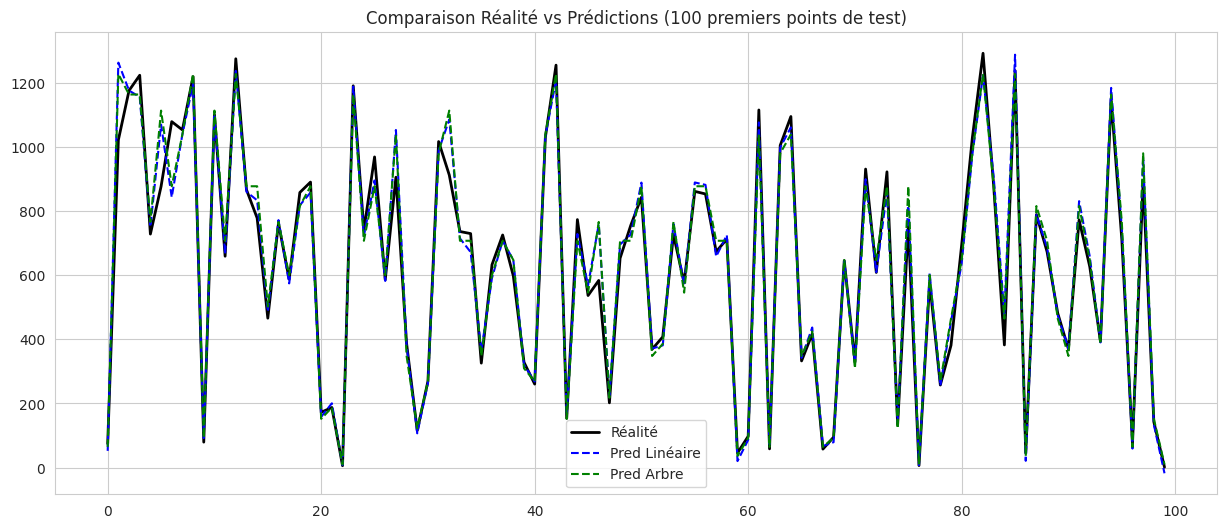

In [ ]:
# ============================
# 1. DATA PREPARATION
# ============================
print("--- 1. Data Preparation ---")

# Merge dataframes
df_merged = pd.merge(df_gen, df_weather, on=['DATE_TIME', 'PLANT_ID'], how='inner')

# CLEANING: Keep only moments with power generation
# (At night, predicting 0 is trivial, we want to predict performance when operating)
df_model = df_merged[df_merged['AC_POWER'] > 0].copy()

# FEATURES:
# IMPORTANT: Remove 'DC_POWER' from X.
# The goal is to predict AC power solely with weather and time.
features_X = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
target_y = 'AC_POWER'

X = df_model[features_X].copy()
y = df_model[target_y]

# Feature Engineering
X['hour'] = X.index.hour
X['day_of_week'] = X.index.dayofweek
# Interaction: The effect of irradiation depends on panel temperature
X['IRR_x_MOD_TEMP'] = X['IRRADIATION'] * X['MODULE_TEMPERATURE']

# Split Train / Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Features used : {X.columns.tolist()}")
print(f"Train set size : {X_train.shape}")
print(f"Test set size : {X_test.shape}")

# ===========================
# 2. MODELING: BASELINE
# ===========================
print("\n--- 2. Baseline Model : Linear Regression ---")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression -> MAE: {mae_lr:.2f} | R2: {r2_lr:.4f}")


# ====================================
# 3. MODELING: DECISION TREE
# ====================================
print("\n--- 3. New Model : Decision Tree Regressor ---")
from sklearn.tree import DecisionTreeRegressor

# Use a Regressor because we predict a number (power), not a class (flower)
# Limit depth (max_depth) to avoid overfitting
model_dt = DecisionTreeRegressor(max_depth=5, random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

# Metrics
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree (depth=5) -> MAE: {mae_dt:.2f} | R2: {r2_dt:.4f}")

# =================================
# 4. COMPARISON & INTERPRETATION
# =================================
print("\n================ CONCLUSION ================")
if r2_dt > r2_lr:
    print(f"The Decision Tree is BETTER (+{(r2_dt - r2_lr):.4f} R2).")
    print("This suggests that the relationship between Weather and Energy is not strictly linear.")
else:
    print("Linear Regression is BETTER.")

# Simple visualization for understanding (Only on 50 points for readability)
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(y_test.values[:100], label='Actual', color='black', linewidth=2)
plt.plot(y_pred_lr[:100], label='Pred Linear', linestyle='--', color='blue')
plt.plot(y_pred_dt[:100], label='Pred Tree', linestyle='--', color='green')
plt.title("Comparison Actual vs Predictions (first 100 test points)")
plt.legend()
plt.show()

--- 1. Préparation des données ---
Features utilisées : ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'hour', 'day_of_week', 'IRR_x_MOD_TEMP']
Taille du train set : (29458, 6)
Taille du test set : (7365, 6)

--- 2. Modèle Baseline : Régression Linéaire ---
Linear Regression -> MAE: 37.87 | R2: 0.9710

--- 3. Modèle Intermédiaire : Arbre de Décision ---
Decision Tree (depth=5) -> MAE: 37.79 | R2: 0.9723

--- 4. Modèle Avancé : Random Forest ---
Random Forest (100 trees) -> MAE: 28.69 | R2: 0.9796

================ PODIUM FINAL ================
1. Random Forest : 97.96% (R2)
2. Arbre de Décision : 97.23% (R2)
3. Régression Linéaire : 97.10% (R2)

Le meilleur modèle est : Random Forest


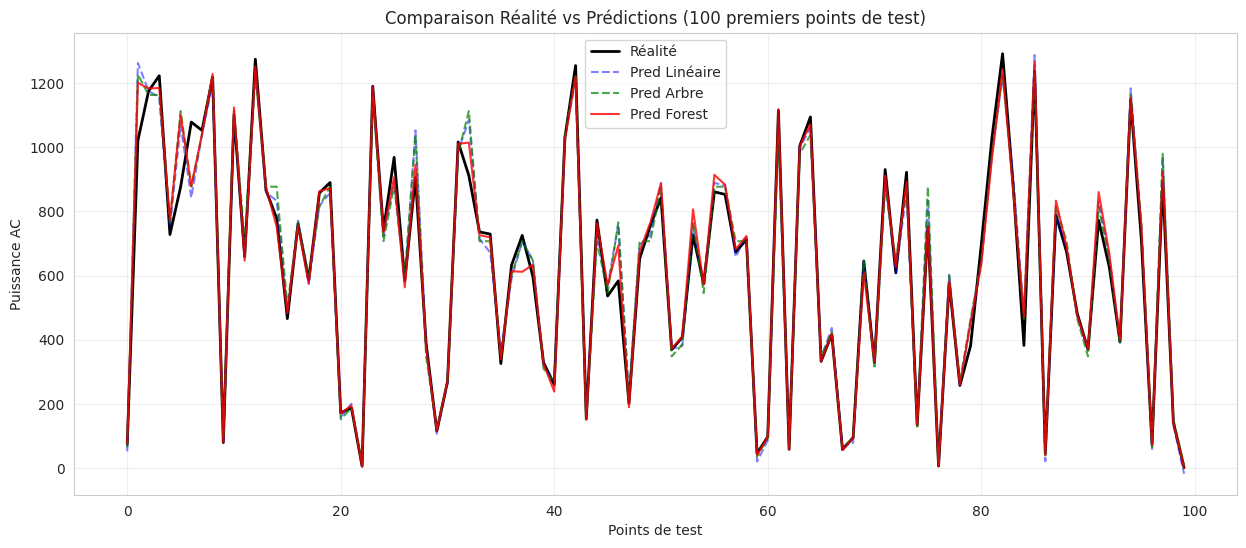

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ============================
# 1. DATA PREPARATION
# ============================
print("--- 1. Data Preparation ---")

# Merge (Ensure df_gen and df_weather are already loaded)
df_merged = pd.merge(df_gen, df_weather, on=['DATE_TIME', 'PLANT_ID'], how='inner')

# CLEANING: Keep only moments with power generation
df_model = df_merged[df_merged['AC_POWER'] > 0].copy()

# FEATURES:
# IMPORTANT: Remove 'DC_POWER' from X to avoid cheating (Data Leakage).
features_X = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
target_y = 'AC_POWER'

X = df_model[features_X].copy()
y = df_model[target_y]

# Feature Engineering
# (If the index is not already datetime, uncomment the following line)
# X.index = pd.to_datetime(df_model['DATE_TIME'])
X['hour'] = X.index.hour
X['day_of_week'] = X.index.dayofweek
# Interaction: The effect of irradiation depends on panel temperature
X['IRR_x_MOD_TEMP'] = X['IRRADIATION'] * X['MODULE_TEMPERATURE']

# Split Train / Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Features used : {X.columns.tolist()}")
print(f"Train set size : {X_train.shape}")
print(f"Test set size : {X_test.shape}")

# ===========================
# 2. MODELING: BASELINE
# ===========================
print("\n--- 2. Baseline Model : Linear Regression ---")

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression -> MAE: {mae_lr:.2f} | R2: {r2_lr:.4f}")

# ====================================
# 3. MODELING: DECISION TREE
# ====================================
print("\n--- 3. Intermediate Model : Decision Tree ---")

# Limit depth to 5 to avoid overfitting
model_dt = DecisionTreeRegressor(max_depth=5, random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

# Metrics
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree (depth=5) -> MAE: {mae_dt:.2f} | R2: {r2_dt:.4f}")

# ==========================================
# 4. MODELING: RANDOM FOREST (NEW)
# ==========================================
print("\n--- 4. Advanced Model : Random Forest ---")

# Create a forest of 100 trees
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest (100 trees) -> MAE: {mae_rf:.2f} | R2: {r2_rf:.4f}")

# =================================
# 5. COMPARISON & INTERPRETATION
# =================================
print("\n================ FINAL PODIUM ================")
models_scores = {
    'Linear Regression': r2_lr,
    'Decision Tree': r2_dt,
    'Random Forest': r2_rf
}

# Sort to display ranking
sorted_models = sorted(models_scores.items(), key=lambda x: x[1], reverse=True)

for i, (name, score) in enumerate(sorted_models):
    print(f"{i+1}. {name} : {score*100:.2f}% (R2)")

print(f"\nThe best model is : {sorted_models[0][0]}")

# Simple visualization for understanding (Zoom on 100 points)
plt.figure(figsize=(15, 6))
plt.plot(y_test.values[:100], label='Actual', color='black', linewidth=2)
plt.plot(y_pred_lr[:100], label='Pred Linear', linestyle='--', color='blue', alpha=0.5)
plt.plot(y_pred_dt[:100], label='Pred Tree', linestyle='--', color='green', alpha=0.7)
plt.plot(y_pred_rf[:100], label='Pred Forest', linestyle='-', color='red', alpha=0.8) # New curve
plt.title("Comparison Actual vs Predictions (first 100 test points)")
plt.ylabel('AC Power')
plt.xlabel('Test Points')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

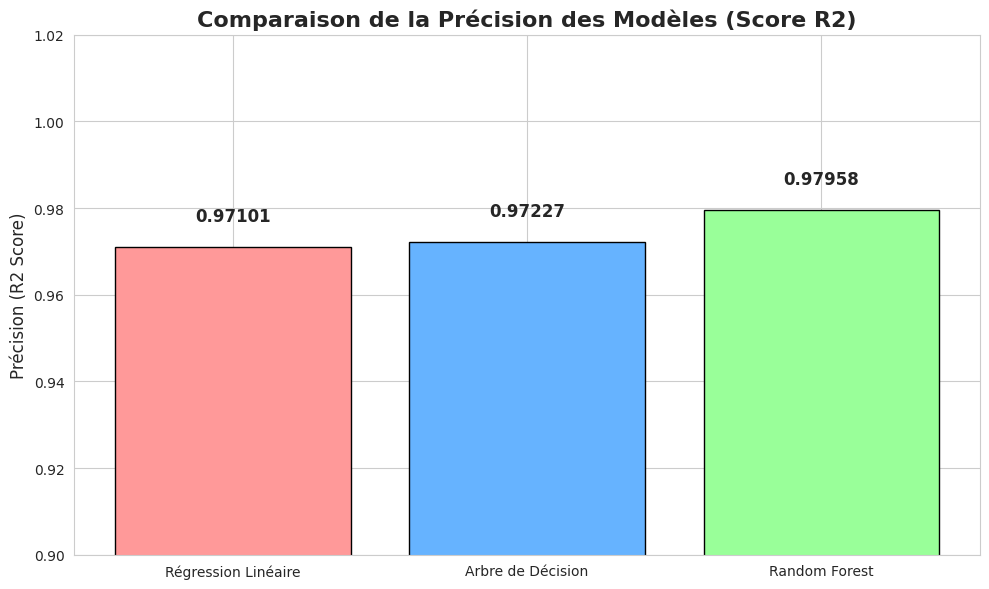

🏆 Le gagnant est : Random Forest
   Score précis : 0.9795764015747221


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for the graph (Ensure models have been run before)
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']
r2_scores = [r2_lr, r2_dt, r2_rf]

# Style configuration
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create barplot
colors = ['#ff9999', '#66b3ff', '#99ff99'] # Red, Blue, Green
bars = plt.bar(model_names, r2_scores, color=colors, edgecolor='black')

# Add PRECISE scores above the bars
for bar in bars:
    yval = bar.get_height()
    # f'{yval:.5f}' displays 5 decimals (e.g., 0.97958)
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.5f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Titles and labels
plt.title('Comparison of Model Accuracy (R2 Score)', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy (R2 Score)', fontsize=12)

# Zoom between 0.90 and 1.0 to clearly see small differences
plt.ylim(0.90, 1.02)

plt.tight_layout()
plt.show()

# Automatic conclusion
winner_index = r2_scores.index(max(r2_scores))
print(f"🏆 The winner is : {model_names[winner_index]}")
print(f"   Precise score : {r2_scores[winner_index]}")

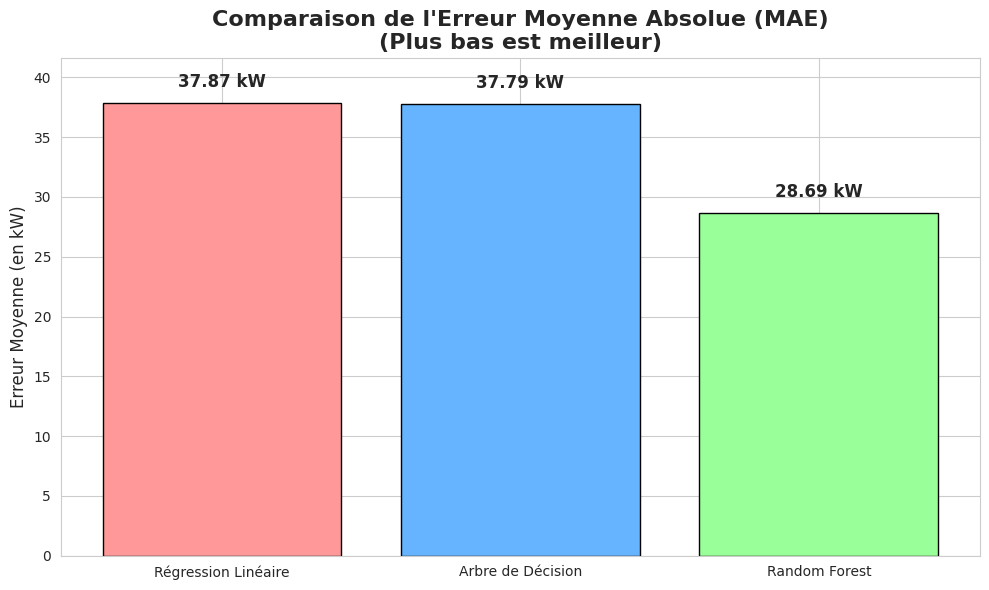

🏆 Le modèle le plus précis est : Random Forest
   Il se trompe en moyenne de seulement 28.69 kW par prédiction.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# GRAPH 2: ERROR COMPARISON (MAE)
# ==========================================

# 1. Retrieve MAE scores (Ensure models are trained)
# If you ran the large code above, these variables already exist.
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']
mae_scores = [mae_lr, mae_dt, mae_rf]

# 2. Sort data (From worst to best for MAE)
# Caution: Here, a LARGE bar is BAD (because it's an error)
# We will sort to have the best (smallest bar) on the right or left.
# Let's create a list of (Name, Score) pairs to sort
data_sorted = sorted(zip(model_names, mae_scores), key=lambda x: x[1], reverse=True)
names_sorted = [x[0] for x in data_sorted]
scores_sorted = [x[1] for x in data_sorted]

# 3. Graph configuration
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Colors: Red (Large error) -> Green (Small error)
colors = ['#ff9999', '#66b3ff', '#99ff99']
bars = plt.bar(names_sorted, scores_sorted, color=colors, edgecolor='black')

# 4. Add exact values
for bar in bars:
    yval = bar.get_height()
    # Display error with 2 decimals (e.g., 35.12 kW)
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f} kW',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# 5. Titles
plt.title('Comparison of Mean Absolute Error (MAE)\n(Lower is better)', fontsize=16, fontweight='bold')
plt.ylabel('Mean Error (in kW)', fontsize=12)

# Add some space at the top
plt.ylim(0, max(scores_sorted) * 1.1)

plt.tight_layout()
plt.show()

# Automatic conclusion
best_mae = min(mae_scores)
best_model_name = model_names[mae_scores.index(best_mae)]
print(f"🏆 The most accurate model is : {best_model_name}")
print(f"   It makes an average error of only {best_mae:.2f} kW per prediction.")